In [7]:
# !isa_file=../data/P279_dataset/wikidata-P279.tsv
# !labels_file=../data/labels.en.tsv
!kgtk query -i ../data/P279_dataset/wikidata-P279.tsv -i ../data/labels.en.tsv \
--match 'i: (x)-[:P279]->(y), l: (x)-[:label]->(lbl), (y)-[:label]->(lbl2)' \
--where 'lbl =~ ".* .*" AND instr(kgtk_unstringify(kgtk_lqstring_text(lbl)), kgtk_unstringify(kgtk_lqstring_text(lbl2))) AND lbl!=lbl2' \
--return 'distinct x, y, kgtk_lqstring_text_string(lbl), kgtk_lqstring_text_string(lbl2)' \
-o ../data/compositional.tsv


In [8]:
!head ../data/compositional.tsv

node1	node2	kgtk_lqstring_text_string(graph_2_c2."node2")	kgtk_lqstring_text_string(graph_2_c3."node2")
Q1000064	Q11016	"nuclear reactor technology"	"technology"
Q1000120	Q12510	"maximal torus"	"torus"
Q100061973	Q1799072	"presentation method"	"method"
Q1000828	Q918385	"team training"	"training"
Q1000850	Q748	"Buddhism in Germany"	"Buddhism"
Q1000859	Q748	"Buddhism in Iceland"	"Buddhism"
Q1000861	Q748	"Buddhism in Ireland"	"Buddhism"
Q1000863	Q376	"master clock"	"clock"
Q1000869	Q748	"Buddhism in Bangladesh"	"Buddhism"


In [25]:
import pandas as pd

comp = pd.read_csv('../data/compositional.tsv', sep='\t')

In [29]:
comp['node1_len'] = comp.node1.apply(lambda p: len(p))
comp['node2_len'] = comp.node2.apply(lambda p: len(p))

In [32]:
comp = comp.sort_values(by=['node1_len', 'node2_len'])

In [33]:
comp.head()

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")",node1_len,node2_len
67979,Q561,Q553,human tooth,tooth,4,4
55355,Q416,Q41298,disk magazine,magazine,4,6
98710,Q944,Q41217,quantum mechanics,mechanics,4,6
49124,Q305,Q186361,corporal punishment,punishment,4,7
41635,Q250,Q1921606,computer keyboard,keyboard,4,8


In [34]:
from tabulate import tabulate

In [39]:
comp[:50].sample(n=25, random_state=13)

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")",node1_len,node2_len
94514,Q8141,Q9288,Modern Hebrew,Hebrew,5,5
41635,Q250,Q1921606,computer keyboard,keyboard,4,8
93984,Q7991,Q336,natural science,science,5,4
98024,Q9192,Q7850,Mandarin Chinese,Chinese,5,5
67979,Q561,Q553,human tooth,tooth,4,4
69745,Q5856,Q161,synthetic fiber,fiber,5,4
87295,Q6754,Q6718,charm quark,quark,5,5
57146,Q4543,Q1734,beach volleyball,volleyball,5,5
99864,Q9778,Q638,electronic music,music,5,4
88511,Q699,Q17991521,fairy tale,tale,4,9


In [38]:
print(tabulate(comp[:50].sample(n=25, random_state=13), headers = 'keys', tablefmt = 'simple'))

       node1    node2      kgtk_lqstring_text_string(graph_2_c2."node2")    kgtk_lqstring_text_string(graph_2_c3."node2")      node1_len    node2_len
-----  -------  ---------  -----------------------------------------------  -----------------------------------------------  -----------  -----------
94514  Q8141    Q9288      Modern Hebrew                                    Hebrew                                                     5            5
41635  Q250     Q1921606   computer keyboard                                keyboard                                                   4            8
93984  Q7991    Q336       natural science                                  science                                                    5            4
98024  Q9192    Q7850      Mandarin Chinese                                 Chinese                                                    5            5
67979  Q561     Q553       human tooth                                      tooth                   

In [24]:
comp.sample(n=20, random_state=13)

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")"
76391,Q66502527,Q27058096,right fifth intercostal nerve,fifth intercostal nerve
64439,Q5453438,Q392316,First Nations in Alberta,First Nations
54764,Q3998922,Q43304311,clarinet-violin-piano trio,piano trio
71844,Q60687320,Q29385978,President of Communal Council of Tremithousa,President of Communal Council
26611,Q21116244,Q14878311,glutamate catabolic process to 2-oxoglutarate,glutamate catabolic process
76415,Q66502641,Q66502435,medial branch of cervicothoracic ganglion,branch of cervicothoracic ganglion
24160,Q20901636,Q705135,Grand Officer of the Order of Adolphe of Nassau,Order of Adolphe of Nassau
27271,Q21127225,Q133492,letters of Pliny the Younger,letter
3924,Q1152224,Q12050496,distinctive feature,feature
84513,Q66571241,Q66570136,right cuneate fasciculus of medulla,cuneate fasciculus of medulla


In [19]:
print(tabulate(comp.sample(n=20, random_state=13), headers = 'keys', tablefmt = 'simple'))

       node1      node2      kgtk_lqstring_text_string(graph_2_c2."node2")    kgtk_lqstring_text_string(graph_2_c3."node2")
-----  ---------  ---------  -----------------------------------------------  -----------------------------------------------
76391  Q66502527  Q27058096  right fifth intercostal nerve                    fifth intercostal nerve
64439  Q5453438   Q392316    First Nations in Alberta                         First Nations
54764  Q3998922   Q43304311  clarinet-violin-piano trio                       piano trio
71844  Q60687320  Q29385978  President of Communal Council of Tremithousa     President of Communal Council
26611  Q21116244  Q14878311  glutamate catabolic process to 2-oxoglutarate    glutamate catabolic process
76415  Q66502641  Q66502435  medial branch of cervicothoracic ganglion        branch of cervicothoracic ganglion
24160  Q20901636  Q705135    Grand Officer of the Order of Adolphe of Nassau  Order of Adolphe of Nassau
27271  Q21127225  Q133492    letter

# Determine Top Parents based on transitive child count

In [1]:
import pandas as pd
import gzip

p279StarDF = pd.read_csv('../../wd-correctness/wikidata-20210215/derived.P279star.tsv.gz', sep='\t', compression='gzip')

In [2]:
p279StarDF_node2_counts = p279StarDF.node2.value_counts()

In [3]:
p279StarDF_node2_counts = p279StarDF_node2_counts.sort_values(ascending=False)

In [4]:
p279StarDF_node2_counts[:20]

Q35120       2461316
Q99527517    2254480
Q28813620    1363013
Q16887380    1362538
Q488383      1286312
Q20937557    1267164
Q58415929    1201300
Q4406616     1175217
Q223557      1164930
Q6671777     1122346
Q337060      1079449
Q7184903     1072421
Q219858      1057006
Q50365914    1056956
Q23958946    1038346
Q97669203    1007383
Q15712714    1007381
Q3511065     1007335
Q3771876     1004686
Q37500013    1004683
Name: node2, dtype: int64

In [62]:
import requests

for qnode,qnode_count in zip(p279StarDF_node2_counts[:100].index, p279StarDF_node2_counts[:100]):
    print(qnode+','+requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0] + "," + str(qnode_count))

Q35120,entity,2461316
Q99527517,collection entity,2254480
Q28813620,set,1363013
Q16887380,group,1362538
Q488383,object,1286312
Q20937557,series,1267164
Q58415929,spatio-temporal entity,1201300
Q4406616,concrete object,1175217
Q223557,physical object,1164930
Q6671777,structure,1122346
Q337060,perceptible object,1079449
Q7184903,abstract object,1072421
Q219858,zone,1057006
Q50365914,biological region,1056956
Q23958946,individual entity,1038346
Q97669203,molecular conformation,1007383
Q15712714,biomolecular structure,1007381
Q3511065,biological sequence,1007335
Q3771876,nucleic acid structure,1004686
Q37500013,primary structure,1004683
Q863908,nucleic acid sequence,1004680
Q7187,gene,1004634
Q103940464,continuant,1003328
Q53617489,independent continuant,1003327
Q27043950,anatomical entity,1003325
Q28732711,physical substance,977526
Q4503801,part and whole,969424
Q1310239,component,960112
Q20747295,protein-coding gene,942018
Q58416391,spatial entity,927246
Q43460564,chemical entity,894604


## Analyze Parents

In [5]:
import pandas as pd
import gzip
from collections import defaultdict
from tqdm.notebook import tqdm

p31p279StarDF_node2_counts_dict = defaultdict(int)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P31P279star.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        p31p279StarDF_node2_counts_dict[line_s[2]] += 1

0it [00:00, ?it/s]

In [6]:
from collections import defaultdict
from tqdm.notebook import tqdm

child_parent_dict = defaultdict(set)
parent_child_dict = defaultdict(set)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P279.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        child_parent_dict[line_s[1]].add(line_s[3])
        parent_child_dict[line_s[3]].add(line_s[1])

0it [00:00, ?it/s]

In [7]:
max_depths = {}
min_depths = {}

def find_max_depth(qnode, depth=0, visited=set()):
    global parent_child_dict
#     print(qnode, depth, visited)
    if qnode not in parent_child_dict:
        return depth
    max_val = depth
    for child in parent_child_dict[qnode]:
        if child not in visited:
            if child not in max_depths:
                max_depths[child] = find_max_depth(child, depth+1, visited | {child})
            max_val = max(max_val, max_depths[child])
    return max_val

def find_min_depth(qnode, depth=0, visited=set()):
    global parent_child_dict
#     print(qnode, depth, visited)
    if qnode not in parent_child_dict:
        return depth
    min_val = float('inf')
    for child in parent_child_dict[qnode]:
        if child not in visited:
            if child not in min_depths:
                min_depths[child] = find_min_depth(child, depth+1, visited | {child})
            min_val = min(min_val, min_depths[child])
    if min_val == float('inf'):
        return depth
    else:
        return min_val

In [8]:
import numpy as np
def entropy_of_children(qnode):
    entropy_sum = 0
    for child in parent_child_dict[qnode]:
        if child in p279StarDF_node2_counts_dict:
            assert p279StarDF_node2_counts_dict[child] <= p279StarDF_node2_counts_dict[qnode], (child, qnode)
            entropy_sum -= p279StarDF_node2_counts_dict[child] / p279StarDF_node2_counts_dict[qnode] * np.log2(p279StarDF_node2_counts_dict[child] / p279StarDF_node2_counts_dict[qnode])
    return float(entropy_sum)

In [9]:
import numpy as np
def entropy_of_children_v_inst(qnode):
    entropy_sum = 0
    if p31p279StarDF_node2_counts_dict[qnode] == 0:
        return "N/A"
    for child in parent_child_dict[qnode]:
        if child in p31p279StarDF_node2_counts_dict:
            assert p31p279StarDF_node2_counts_dict[child] <= p31p279StarDF_node2_counts_dict[qnode], (child, qnode)
            if p31p279StarDF_node2_counts_dict[child] == 0:
                continue
            entropy_sum -= p31p279StarDF_node2_counts_dict[child] / p31p279StarDF_node2_counts_dict[qnode] * np.log2(p31p279StarDF_node2_counts_dict[child] / p31p279StarDF_node2_counts_dict[qnode])
    return float(entropy_sum)

In [134]:
def get_reduction_ratio(qnode):
    return [round(p31p279StarDF_node2_counts_dict[qnode] / p31p279StarDF_node2_counts_dict[parent],2) for parent in child_parent_dict[qnode] if p31p279StarDF_node2_counts_dict[parent] != 0]

In [11]:
newRows = []
for _, row in tqdm(top_parents.iterrows()):
    row['child_count'] = len(parent_child_dict[row['qnode']])
    row['max_no_of_siblings'] = max([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[row['qnode']]]) if child_parent_dict[row['qnode']] else 0
    row['min_no_of_siblings'] = min([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[row['qnode']]]) if child_parent_dict[row['qnode']] else 0
    row['max_depth'] = find_max_depth(row['qnode'])
    row['min_depth'] = find_min_depth(row['qnode'])
    row['entropy'] = entropy_of_children(row['qnode'])
    row['red_ratios'] = get_reduction_ratio(row['qnode'])
    newRows.append(row)

NameError: name 'top_parents' is not defined

In [ ]:
parent_child_dict['Q2424752']

In [ ]:
pd.DataFrame(newRows)

In [ ]:
# pd.DataFrame(newRows).to_csv('../data/Analogical_Dataset/top_parents_analysis.csv',index=None)

## Analyze Product (Q15401930) Ontology

In [12]:
def print_ontology_subtree(ont_obj, max_children):
    _, ret_str, children = ont_obj
    print(ret_str)
    for child in children[:max_children]:
        print_ontology_subtree(child, max_children)

In [132]:
import requests
def fetch_label(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
    except:
        return str(False)

In [171]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def generate_ontology_tree(qnode, tree_prefix, levels):
    if levels == 0:
        return []
    ent = entropy_of_children_v_inst(qnode)
    ret_str = f"{tree_prefix}── {fetch_label(qnode)} : {qnode} = [ {bcolors.OKBLUE}chil:{len(parent_child_dict[qnode])}{bcolors.ENDC}, {bcolors.FAIL}inst cnt:{p31p279StarDF_node2_counts_dict[qnode]}{bcolors.ENDC}, \
{bcolors.OKGREEN}max_sib:{max([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[qnode]]) if child_parent_dict[qnode] else 0}{bcolors.ENDC}, \
{bcolors.OKCYAN}min_sib:{min([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[qnode]]) if child_parent_dict[qnode] else 0}{bcolors.ENDC}, \
{bcolors.BOLD}ent: {round(ent, 2) if ent != 'N/A' else ent}{bcolors.ENDC}, {bcolors.UNDERLINE}red_ratios: {get_reduction_ratio(qnode)}{bcolors.ENDC} ]"
#     print(ret_str)
    
    children = []
    
    for child in parent_child_dict[qnode]:
        temp = generate_ontology_tree(child, tree_prefix + '   ├', levels - 1)
        if len(temp):
#             print(temp)
            children += [temp]
    if len(children) > 0:
#         print((children))
        children.sort(key=lambda p: -p[0])
    return (p31p279StarDF_node2_counts_dict[qnode], ret_str, children)

In [186]:
find_max_depth('Q15401930')

17

In [172]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", 3), 5)

 ├── product : Q15401930 = [ chil:17, inst cnt:55141522, max_sib:55, min_sib:55, ent: 0.13, red_ratios: [0.75] ]
 ├   ├── work : Q386724 = [ chil:126, inst cnt:54897575, max_sib:42, min_sib:16, ent: 1.92, red_ratios: [1.0, 0.93] ]
 ├   ├   ├── intellectual work : Q15621286 = [ chil:33, inst cnt:49822972, max_sib:125, min_sib:125, ent: 0.52, red_ratios: [0.91] ]
 ├   ├   ├── publication : Q732577 = [ chil:92, inst cnt:40051926, max_sib:125, min_sib:125, ent: 0.66, red_ratios: [0.73] ]
 ├   ├   ├── electronic page : Q5358404 = [ chil:1, inst cnt:7848509, max_sib:125, min_sib:6, ent: 0.0, red_ratios: [1.0, 0.14, 1.0] ]
 ├   ├   ├── human-made geographic feature : Q811430 = [ chil:136, inst cnt:4164059, max_sib:125, min_sib:9, ent: 1.17, red_ratios: [0.08, 1.0] ]
 ├   ├   ├── architectural structure : Q811979 = [ chil:315, inst cnt:3863871, max_sib:135, min_sib:2, ent: 3.94, red_ratios: [0.07, 0.93, 0.12, 1.0, 0.36] ]
 ├   ├── product : Q2424752 = [ chil:152, inst cnt:757975, max_sib:135, 

# Dataset Subset 2 (Common Parent)

In [26]:
import pandas as pd

comp = pd.read_csv('../data/compositional.tsv', sep='\t')

In [39]:
compDict = {row['node1']: row['node2'] for _, row in comp.iterrows()}

In [158]:
trainingDF = pd.read_csv('../data/Analogical_Dataset/Analogical_Test_File.csv')

In [31]:
trainingDF[trainingDF.type == 'POS_SAME_PAR'].head()

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,type
25,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q444321,Q2009740,telephone keybad,keypad,PURPOSE,POS_SAME_PAR
26,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q807980,Q82744,barcode reader,image scanner,PURPOSE,POS_SAME_PAR
27,Q7991,Q336,natural science,science,PROPERTY,Q2914650,Q7163,identity politics,politics,PROPERTY,POS_SAME_PAR
28,Q7991,Q336,natural science,science,PROPERTY,Q4259813,Q9174,liberal religion,religion,PROPERTY,POS_SAME_PAR
29,Q7991,Q336,natural science,science,PROPERTY,Q10404171,Q186005,thermal therapy,physiotherapy,PROPERTY,POS_SAME_PAR


In [40]:
trainingDFSubset = trainingDF[trainingDF.type == 'POS_SAME_PAR']

In [41]:
trainingDFSubset.head()

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,type,Unnamed: 11
25,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q444321,Q2009740,telephone keybad,keypad,PURPOSE,POS_SAME_PAR,NaN
26,Q54854916,Q1921606,typewriter keyboard,keyboard,PURPOSE,Q807980,Q82744,barcode reader,image scanner,PURPOSE,POS_SAME_PAR,NaN
27,Q7991,Q336,natural science,science,PROPERTY,Q2914650,Q7163,identity politics,politics,PROPERTY,POS_SAME_PAR,NaN
28,Q1637030,Q336,food science,science,PROPERTY,Q4259813,Q9174,liberal religion,religion,PROPERTY,POS_SAME_PAR,NaN
29,Q16387,Q336,information science,science,PROPERTY,Q10404171,Q186005,thermal therapy,physiotherapy,PROPERTY,POS_SAME_PAR,NaN


In [44]:
def checkIfExists(row, node1_col, node2_col):
    return row[node1_col] in compDict and row[node2_col] == compDict[row[node1_col]]
trainingDFSubset['pair1_exists'] = trainingDFSubset.apply(checkIfExists, args=('node1','node2'), axis=1)
trainingDFSubset['pair2_exists'] = trainingDFSubset.apply(checkIfExists, args=('other_node1','other_node2'), axis=1)

<ipython-input-44-dd012d3407e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingDFSubset['pair1_exists'] = trainingDFSubset.apply(checkIfExists, args=('node1','node2'), axis=1)
<ipython-input-44-dd012d3407e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingDFSubset['pair2_exists'] = trainingDFSubset.apply(checkIfExists, args=('other_node1','other_node2'), axis=1)


In [45]:
trainingDFSubset['pair2_exists'].value_counts()

True     35
False    15
Name: pair2_exists, dtype: int64

In [ ]:
def checkIfCommonParent(row):
    if row['node2'] not in compDict or row['other_node2'] not in compDict:
        return -1
    elif compDict[row['node2']] == compDict[row['other_node2']]:
        return 1
    else:
        return 0
# trainingDFSubset.apply(checkIfCommonParent, axis=1)

# Dataset Subset 3 (Common Ancestor)

In [29]:
trainingDF = pd.read_csv('../data/Analogical_Dataset/Analogical_Test_File.csv')

In [30]:
trainingDFSubset = trainingDF[trainingDF.type == 'POS_SAME_ANC']

In [31]:
trainingDFSubset

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,node2_desc,other_node1_desc,other_node2_desc,comment,par_node,par_label,pair1_ancestor,pair2_ancestor,top_pars_list,Unnamed: 22
75,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q614379,Q327065,scoreboard,display device,PURPOSE,...,data input device,display device used in sports,output device for presentation of information ...,NaN,NaN,NaN,Q1921606:keyboard|Q864114:input device|Q47146:...,Q327065:display device|Q778637:output device|Q...,"entity,object,physical object,abstract object,...","entity,object,physical object,abstract object,..."
76,Q7991,Q336,natural science,science,PROPERTY,Q1140700,Q11635,improvisational theatre,theatre,PROPERTY,...,systematic enterprise that builds and organize...,theatrical genre,collaborative form of performing and fine art,NaN,NaN,NaN,Q336:science|Q11862829:academic discipline|Q10...,Q11635:theater|Q184485:performing arts|Q201852...,"entity,object,abstract object","entity,object,abstract object,structure"
77,Q16387,Q336,information science,science,PROPERTY,Q442927,Q11032,party newspaper,newspaper,PROPERTY,...,systematic enterprise that builds and organize...,periodical of a political party or organization,scheduled publication containing news of event...,NaN,NaN,NaN,Q336:science|Q11862829:academic discipline|Q10...,Q11032:newspaper|Q1002697:periodical|Q234460:t...,"entity,object,abstract object","entity,object,physical object,abstract object,..."
78,Q9192,Q7850,Mandarin Chinese,Chinese,LOCATION,Q1122452,Q29536,Germanic paganism,paganism,LOCATION,...,group of languages that belongs to the Sino-Ti...,ethnic religion practiced by the Germanic peop...,"non-Abrahamic religion, or modern religious mo...",NaN,NaN,NaN,Q7850:Chinese|Q33857:Sinitic languages|Q45961:...,Q29536:paganism|Q9174:religion|Q3702971:person...,"entity,object,abstract object,property","entity,object,abstract object,structure,proper..."
79,Q56479,Q7850,Jin Chinese,Chinese,LOCATION,Q702065,Q9134,Korean mythology,mythology,LOCATION,...,group of languages that belongs to the Sino-Ti...,Mythology that existed in the Korean Peninsula...,stories of gods and fairies and fantastic crea...,NaN,NaN,NaN,Q7850:Chinese|Q33857:Sinitic languages|Q45961:...,Q9134:mythology|Q49447:world view|Q20978643:po...,"entity,object,abstract object,property","entity,object,abstract object,property,relatio..."
80,Q561,Q553,human tooth,tooth,OWNERSHIP,Q104539126,Q211709,human blood cell,blood cell,OWNERSHIP,...,"hard, calcified structure found in the jaws (o...",blood cell of Homo sapiens,cell produced by hematopoiesis,NaN,NaN,NaN,NaN,NaN,"entity,object,physical object",NaN
81,Q5856,Q161,synthetic fiber,fiber,MATERIAL,Q67890691,Q6584340,coconut syrup,syrup,MATERIAL,...,"natural or synthetic substance made of long, t...",syrup made of coconuts,"thick, viscous liquid consisting primarily of ...",NaN,NaN,NaN,Q161:fiber|Q214609:material|Q2424752:product,Q6584340:syrup|Q40050:drink|Q2095:food|Q119405...,"entity,object,physical object,product","entity,object,physical object,product"
82,Q4543,Q1734,beach volleyball,volleyball,LOCATION,Q55491,Q55488,underground railway station,railway station,LOCATION,...,ballgame and team sport in which two teams com...,railway station located below grade,railway facility where trains regularly stop t...,NaN,NaN,NaN,Q1734:volleyball|Q877517:ball game|Q4438147:sp...,Q55488:railway station|Q1318558:operation poin...,"entity,object,action,phenomenon","entity,object,physical object,structure"
83,Q15728017,Q1734,snow volleyball,volleyball,LOCATION,Q99689267,Q3305213,leather painting,painting,LOCATION,...,ballgame and team sport in which two teams com...,type of artwork,"visual artwork, surface artistically covered w...",NaN,NaN,NaN,Q1734:volleyball|Q877517:ball game|Q4438147:sp...,Q3305213:painting|Q4502142:visual artwork|Q838...,"entity,object,action,phenomenon","entity,object,physical object"
84,Q9778,Q638,elect

In [178]:
from collections import defaultdict
from tqdm.notebook import tqdm

subset_nodes = set(trainingDFSubset.node1.to_list() + trainingDFSubset.node2.to_list() + trainingDFSubset.other_node1.to_list() + trainingDFSubset.other_node2.to_list())
parent_dict = defaultdict(set)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P279star.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        if line_s[0] in subset_nodes:
            parent_dict[line_s[0]].add(line_s[2])

0it [00:00, ?it/s]

In [166]:
top_nodes = {'Q35120': 'entity', 'Q488383': 'object', 'Q223557': 'physical object', 'Q7184903': 'abstract object',
             'Q6671777': 'structure', 'Q219858': 'zone', 'Q1621273': 'particle', 'Q174211': 'organic compound', 
             'Q4026292': 'action', 'Q937228': 'property', 'Q2424752': 'product', 'Q215627': 'person', 'Q4897819': 'role',
             'Q7239': 'organism', 'Q930933': 'relation', 'Q16722960': 'phenomenon'}

In [167]:
list(top_nodes.values())

['entity',
 'object',
 'physical object',
 'abstract object',
 'structure',
 'zone',
 'particle',
 'organic compound',
 'action',
 'property',
 'product',
 'person',
 'role',
 'organism',
 'relation',
 'phenomenon']

## Pairwise Top Parent Analysis

In [191]:
from collections import defaultdict
from tqdm.notebook import tqdm

child_parent_dict = defaultdict(set)
parent_child_dict = defaultdict(set)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P279.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        child_parent_dict[line_s[1]].add(line_s[3])
        parent_child_dict[line_s[3]].add(line_s[1])

0it [00:00, ?it/s]

In [141]:
def find_parent_path(curr, top_parent, path):
    if curr == top_parent:
        return path + [top_parent]
    elif curr not in child_parent_dict:
        return False
    
    for par in child_parent_dict[curr]:
        new_path = find_parent_path(par, top_parent, path + [curr])
        if new_path:
            return new_path

    return None

In [143]:
def find_common_top_parents(node1, node2):
    pars1, pars2 = set(), set()
    for top_node in top_nodes:
        if top_node in parent_dict[node1]:
            pars1.add(top_node)
        if top_node in parent_dict[node2]:
            pars2.add(top_node)
    return pars1 & pars2

In [168]:
def shortest_common_path(node1, node2):
    node1_shortest, node2_shortest = [], []
    shortest_len = float('inf')
    for top_par in find_common_top_parents(node1, node2):
        node1_path = find_parent_path(node1, top_par, [])
        node2_path = find_parent_path(node2, top_par, [])
        
        if node1_path and node2_path and max(len(node1_path), len(node2_path)) < shortest_len:
            node1_shortest = node1_path
            node2_shortest = node2_path
            shortest_len = max(len(node1_path), len(node2_path))
    node1_shortest = "|".join([node + ':' + fetch_label(node) for node in node1_shortest])
    node2_shortest = "|".join([node + ':' + fetch_label(node) for node in node2_shortest])
    pars1 = {}
    pars2 = {}
    for top_node in top_nodes:
        if top_node in parent_dict[row['node2']]:
            pars1[top_node] = top_nodes[top_node]
        if top_node in parent_dict[row['other_node2']]:
            pars2[top_node] = top_nodes[top_node]
    return node1_shortest + ";" + node2_shortest + ';' + ",".join(list(pars1.values())) + ';' + ",".join(list(pars2.values()))

In [356]:
def fetch_label(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
    except:
        return str(False)

In [276]:
trainingSubsetCommonPaths = []
for _,row in tqdm(trainingDFSubset.iterrows()):
    trainingSubsetCommonPaths.append(shortest_common_path(row['node2'], row['other_node2']))

0it [00:00, ?it/s]

In [277]:
trainingSubsetCommonPaths

['Q1921606:keyboard|Q864114:input device|Q47146:user interface|Q23808:interface|Q230629:connection|Q930933:relation;Q327065:display device|Q778637:output device|Q47146:user interface|Q23808:interface|Q230629:connection|Q930933:relation;entity,object,physical object,abstract object,product,person,relation;entity,object,physical object,abstract object,product,relation',
 'Q336:science|Q11862829:academic discipline|Q1047113:specialty|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;Q11635:theater|Q184485:performing arts|Q2018526:arts|Q80083:humanities|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;entity,object,abstract object;entity,object,abstract object,structure',
 'Q336:science|Q11862829:academic discipline|Q1047113:specialty|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;Q11032:newspaper|Q1002697:periodical|Q234460:text|Q11028:information|Q7184903:abstract object;entity,object,abstract object;

In [185]:
def fetchDescription(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
    except:
        return str(False)

## Find Candidates

In [281]:
fetchDescription('Q1107656')

'planned space set aside for the display, cultivation, and enjoyment of plants'

In [305]:
par_qnode = 'Q2424752'
results = []
for child in tqdm(parent_child_dict[par_qnode]):
    if fetch_label(child) != 'False' and fetchDescription(child) != 'False':
        results.append((child, fetch_label(child), fetchDescription(child), ))
pd.DataFrame(results).head(50)

  0%|          | 0/152 [00:00<?, ?it/s]

,0,1,2
0,Q251473,foil,"very thin sheet metal, usually made by hammeri..."
1,Q133080,public relations,broad term for the management of public commun...
2,Q1823435,reflector,reflective surface used to redirect light towa...
3,Q45621,ceramic,"inorganic, nonmetallic solid prepared by the a..."
4,Q49393,projectile,any object thrown into space (empty or not) by...
5,Q29560312,imitation tortoiseshell,material made of translucent plastic or other ...
6,Q62577,haystack,pile of hay
7,Q207822,packaging and labeling,enclosure or protection of products for distri...
8,Q281066,vaporware,product that is announced but is never actuall...
9,Q259864,microarchitecture,way a given instruction set architecture (ISA)...


In [278]:
trainingSubsetCommonPaths = []
for _,row in tqdm(trainingDF.iterrows()):
    trainingSubsetCommonPaths.append((fetchDescription(row['node1']) + '&' + fetchDescription(row['node2']) + '&' + \
                                     fetchDescription(row['other_node1']) + '&' + fetchDescription(row['other_node2'])))

0it [00:00, ?it/s]

In [279]:
trainingSubsetCommonPaths

['device comprising an arrangement of buttons or keys used to input text in computers&data input device&keyboard of a typewriter&data input device',
 'branch of science about the natural world&systematic enterprise that builds and organizes knowledge&applied science devoted to the study of food&systematic enterprise that builds and organizes knowledge',
 'study of the philosophical, biological, social, and cultural aspects of human life.&systematic enterprise that builds and organizes knowledge&field primarily concerned with the analysis, collection, classification, manipulation, storage, retrieval and dissemination of information&systematic enterprise that builds and organizes knowledge',
 'group of related varieties or dialects spoken across most of Northern and Southwestern China&group of languages that belongs to the Sino-Tibetan family&language family&group of languages that belongs to the Sino-Tibetan family',
 'language&group of languages that belongs to the Sino-Tibetan family&

# BERT based analogical analysis

In [33]:
def fetchDescription(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
    except:
        return str(False)

In [37]:

rows = []
for _,row in tqdm(trainingDF.iterrows()):
#     row['pair1_desc'] = fetch_label(row['node1']) + ' ' + fetchDescription(row['node1']) + \
#                         ' is related to ' + fetch_label(row['node2']) + ' ' + fetchDescription(row['node2'])
#     row['pair2_desc'] = fetch_label(row['other_node1']) + ' ' + fetchDescription(rssow['other_node1']) + \
#                         ' is related to ' + fetch_label(row['other_node2']) + ' ' + fetchDescription(row['other_node2'])
    
    row['pair1_desc'] = fetch_label(row['node1']) + ' is ' + fetchDescription(row['node1'])
    row['pair2_desc'] = fetch_label(row['other_node1']) + ' is ' + fetchDescription(row['other_node1'])
    rows.append(row)

0it [00:00, ?it/s]

In [300]:

# rows = []
# for _,row in tqdm(trainingDF.iterrows()):
#     row['pair1_desc'] = fetch_label(row['node1']) + \
#                         ' is related to ' + fetch_label(row['node2'])
#     row['pair2_desc'] = fetch_label(row['other_node1']) + \
#                         ' is related to ' + fetch_label(row['other_node2'])
#     rows.append(row)

0it [00:00, ?it/s]

In [38]:
analogicalDF = pd.DataFrame(rows)

In [39]:
analogicalDF.head()

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,other_node2_desc,comment,par_node,par_label,pair1_ancestor,pair2_ancestor,top_pars_list,Unnamed: 22,pair1_desc,pair2_desc
0,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q54854916,Q1921606,typewriter keyboard,keyboard,PURPOSE,...,data input device,NaN,NaN,NaN,NaN,NaN,NaN,NaN,computer keyboard is device comprising an arra...,typewriter keyboard is keyboard of a typewriter
1,Q7991,Q336,natural science,science,PROPERTY,Q1637030,Q336,food science,science,PROPERTY,...,systematic enterprise that builds and organize...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,natural science is branch of science about the...,food science is applied science devoted to the...
2,Q1587903,Q336,human science,science,PROPERTY,Q16387,Q336,information science,science,PROPERTY,...,systematic enterprise that builds and organize...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"human science is study of the philosophical, b...",information science is field primarily concern...
3,Q9192,Q7850,Mandarin Chinese,Chinese,LOCATION,Q56504,Q7850,Min Chinese,Chinese,LOCATION,...,group of languages that belongs to the Sino-Ti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mandarin Chinese is group of related varieties...,Min Chinese is language family
4,Q56479,Q7850,Jin Chinese,Chinese,LOCATION,Q34290,Q7850,Wu Chinese,Chinese,LOCATION,...,group of languages that belongs to the Sino-Ti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jin Chinese is language,Wu Chinese is group of Chinese languages prima...


In [40]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from time import time
import pandas as pd
def getSentEmbeddings(valSeries, modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(valSeries)
#     print(time()-start,'s')
    return encodings

In [41]:
analogicalDF['pair1_emb'] = pd.Series(list(getSentEmbeddings(analogicalDF['pair1_desc'], 'bert-base-nli-mean-tokens')))
analogicalDF['pair2_emb'] = pd.Series(list(getSentEmbeddings(analogicalDF['pair2_desc'], 'bert-base-nli-mean-tokens')))



In [42]:
analogicalDF['cosSim'] = analogicalDF.apply(lambda p: cosine_similarity(np.array(p['pair1_emb']).reshape(1,-1),np.array(p['pair2_emb']).reshape(1,-1))[0][0], axis=1)

In [43]:
analogicalDF[analogicalDF['type'] == 'NEG']['cosSim'].describe()

count    100.000000
mean       0.263929
std        0.098015
min        0.003917
25%        0.212610
50%        0.260633
75%        0.332077
max        0.527121
Name: cosSim, dtype: float64

In [44]:
analogicalDF[analogicalDF['type'] != 'NEG']['cosSim'].describe()

count    100.000000
mean       0.451771
std        0.161400
min        0.001813
25%        0.339480
50%        0.460320
75%        0.561554
max        0.819321
Name: cosSim, dtype: float64

In [180]:
analogicalDF['type'].value_counts()

NEG               100
POS_SAME_PAR       50
POS_SAME_ANC       25
POS_SAME_NODE2     25
Name: type, dtype: int64

<AxesSubplot:>

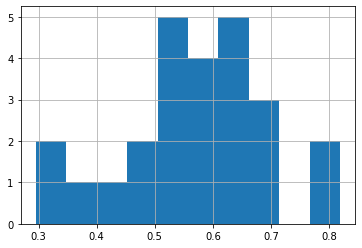

In [183]:
analogicalDF[analogicalDF['type'] == 'POS_SAME_NODE2']['cosSim'].hist()

<AxesSubplot:>

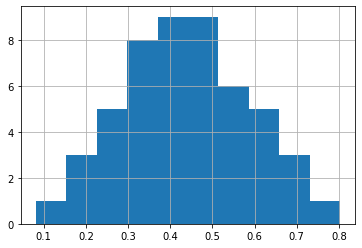

In [181]:
analogicalDF[analogicalDF['type'] == 'POS_SAME_PAR']['cosSim'].hist()

<AxesSubplot:>

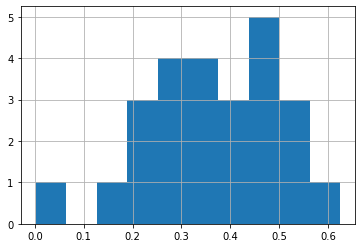

In [182]:
analogicalDF[analogicalDF['type'] == 'POS_SAME_ANC']['cosSim'].hist()

<AxesSubplot:>

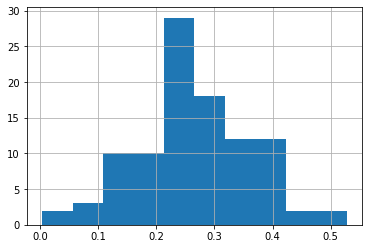

In [184]:
analogicalDF[analogicalDF['type'] == 'NEG']['cosSim'].hist()

In [47]:
analogicalDF['cosSim'].describe()

count    200.000000
mean       0.357850
std        0.163108
min        0.001813
25%        0.246517
50%        0.332507
75%        0.466511
max        0.819321
Name: cosSim, dtype: float64

In [49]:
analogicalDF['target'] = analogicalDF['type'].apply(lambda p: 0 if p == 'NEG' else 1)

In [50]:
from sklearn.model_selection import StratifiedKFold

X, Y = analogicalDF.drop(columns=['target']), analogicalDF['target']

skf = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)
X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
for train_index, test_index in skf.split(X, Y):
    X_train_splits.append(X.iloc[train_index])
    X_test_splits.append(X.iloc[test_index])
    Y_train_splits.append(Y.iloc[train_index])
    Y_test_splits.append(Y.iloc[test_index])

In [74]:
import numpy as np

trainAcc = []
testAcc = []
thresh_range = np.arange(0,1.05,0.05)
for thresh in thresh_range:
    avgTrain, avgVal = 0, 0
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        avgTrain += (X_train1['cosSim'].apply(lambda p: int(p >= thresh)) == Y_train1).sum() * 100 / len(Y_train1)
        avgVal += (X_test1['cosSim'].apply(lambda p: int(p >= thresh)) == Y_test1).sum() * 100 / len(Y_test1)
    trainAcc.append(avgTrain / 10)
    testAcc.append(avgVal / 10)

In [89]:
import matplotlib.pyplot as plt
def plot_accuracies(thresh_range, train_accuracies, val_accuracies, title):
    plt.plot(thresh_range, train_accuracies, color='red', label='Training')
    plt.plot(thresh_range, val_accuracies, color='blue', label='Test')
    plt.title(title)
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")
    plt.legend()

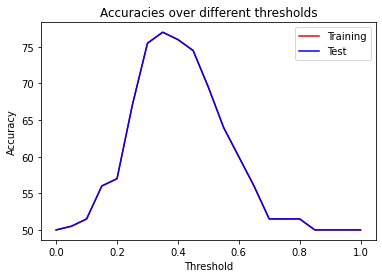

In [90]:
plot_accuracies(thresh_range, trainAcc, testAcc, "Accuracies over different thresholds")

# Embedding based analogical analysis

In [85]:
import gensim.downloader as api
corpus = api.load('text8')
from gensim.models.word2vec import Word2Vec
model_glove = api.load("glove-wiki-gigaword-300")

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.9% 67.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.3% 113.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.5% 159.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.7% 205.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.1% 248.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.4% 294.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.8% 341.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded


In [86]:
model_w2v = api.load("word2vec-google-news-300")

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.1% 68.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.9% 114.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.6% 159.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.4% 206.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.2% 252.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 18.0% 299.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.8% 345.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.5% 391.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.3% 437.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.0% 482.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.9% 546.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 36.0% 597.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.7% 643.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.9% 713.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.5% 773.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 50.0% 830.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.7% 893.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.0% 948.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.4% 1003.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.7% 1058.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.6% 1124.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.2% 1184.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.0% 1247.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.7% 1309.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.6% 1356.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.4% 1436.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.9% 1511.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.1% 1581.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.5% 1654.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [162]:
def generate_distance_values(df, col1, col2, embMap):
    resultsArr = []
    for _, row in tqdm(df[[col1, col2]].iterrows()):
        missesChild, missesParent = 0, 0
        childAvgEmb = None
        parentAvgEmb = None
        for word in row[col1].split():
            if word not in embMap:
                missesChild += 1
                continue
            if childAvgEmb is None:
                childAvgEmb = np.array(embMap[word])
            else:
                childAvgEmb += np.array(embMap[word])
        if childAvgEmb is not None:
            childAvgEmb /= (len(row[col1].split()) - missesChild)
        for word in row[col2].split():
            if word not in embMap:
                missesParent += 1
                continue
            if parentAvgEmb is None:
                parentAvgEmb = np.array(embMap[word])
            else:
                parentAvgEmb += np.array(embMap[word])
        if parentAvgEmb is not None:
            parentAvgEmb /= (len(row[col2].split()) - missesParent)
        if childAvgEmb is None or parentAvgEmb is None:
            cosSim = 0
        else:
            cosSim = cosine_similarity(childAvgEmb.reshape(1, -1), parentAvgEmb.reshape(1, -1))[0][0]
        resultsArr.append((cosSim, (len(row[col1].split()) - missesChild), (len(row[col2].split()) - missesParent)))
    
    return resultsArr

In [173]:
def get_results(model_glove):
    diff = []
    for tup1, tup2, relation in zip(generate_distance_values(analogicalDF, 'node1_label', 'node2_label', model_glove), 
                                                 generate_distance_values(analogicalDF, 'other_node1_label', 'other_node2_label', model_glove), analogicalDF['relation'].to_list()):
        cosSim1, childLen1, parLen1 = tup1
        cosSim2, childLen2, parLen2 = tup2
        diff.append((abs(cosSim1-cosSim2) if cosSim1 is not None and cosSim2 is not None else 0, cosSim1, childLen1, parLen1, cosSim2, childLen2, parLen2, relation))
    return pd.DataFrame(diff[:100], columns=['absDiff', 'cosSim1', 'childLen1', 'parLen1', 'cosSim2', 'childLen2', 'parLen2', 'relation'])

In [185]:
get_results(model_glove)['absDiff']

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,absDiff,cosSim1,childLen1,parLen1,cosSim2,childLen2,parLen2,relation
0,0.032396,0.846375,2,1,0.878771,2,1,PURPOSE
1,0.027112,0.825118,2,1,0.798006,2,1,PROPERTY
2,0.013147,0.821372,2,1,0.834520,2,1,PROPERTY
3,0.000000,0.000000,0,0,0.000000,0,0,LOCATION
4,0.000000,0.000000,0,0,0.000000,0,0,LOCATION
...,...,...,...,...,...,...,...,...
95,0.022937,0.831927,2,1,0.854864,2,1,TEMPORAL
96,0.131315,0.809284,2,1,0.677969,3,1,MATERIAL
97,0.034541,0.918578,2,1,0.884037,3,2,PROPERTY
98,0.144511,0.680450,2,1,0.824961,2,1,PROPERTY


In [178]:
get_results(model_glove).groupby(by=['relation']).absDiff.describe()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,count,mean,std,min,25%,50%,75%,max
relation,,,,,,,,
INSTANCE,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LOCATION,19.0,0.198124,0.341686,0.000000,0.008816,0.052128,0.137478,1.000000
MATERIAL,11.0,0.169349,0.193210,0.005260,0.021291,0.131315,0.252886,0.649969
OWNERSHIP,5.0,0.063606,0.055941,0.016965,0.027937,0.042872,0.074320,0.155938
PROPERTY,53.0,0.120660,0.187584,0.001920,0.025978,0.054974,0.115214,1.000000
PURPOSE,4.0,0.411211,0.264051,0.032396,0.345001,0.487700,0.553910,0.637049
TEMPORAL,3.0,0.021268,0.002086,0.018929,0.020433,0.021936,0.022437,0.022937


In [179]:
get_results(model_w2v).groupby(by=['relation']).absDiff.describe()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,count,mean,std,min,25%,50%,75%,max
relation,,,,,,,,
INSTANCE,5.0,0.117523,0.097973,0.021694,0.025490,0.108110,0.191720,0.240600
LOCATION,19.0,0.089379,0.143677,0.000931,0.016605,0.045471,0.105382,0.634464
MATERIAL,11.0,0.138015,0.120588,0.004553,0.034243,0.137728,0.219396,0.341751
OWNERSHIP,5.0,0.093750,0.058257,0.022403,0.058942,0.098379,0.112120,0.176906
PROPERTY,53.0,0.145545,0.217582,0.001850,0.026523,0.067715,0.135225,0.846893
PURPOSE,4.0,0.437823,0.278867,0.047450,0.334249,0.519706,0.623280,0.664429
TEMPORAL,3.0,0.058757,0.033868,0.023616,0.042541,0.061465,0.076328,0.091190


In [195]:
a = 5
b = 3


In [196]:
a = a^b
b = a^b
a = a^b

In [197]:
a,b

(3, 5)